## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import json

## NeoWs (Near Earth Object Web Service)

In [2]:
api_key = "ro8Gqgfrc7R7dpb7JkZhHamQobkjrC7zXdP9ZML8"
num_paginas = 100
raw_data = []
for page in range(num_paginas - 1):
    resp = requests.get(f'https://api.nasa.gov/neo/rest/v1/neo/browse?page={page}&api_key={api_key}')
    raw_data.append(json.loads(resp.text))

### Data Frame simplificado

In [3]:
int_cols = ['id',
           'name',
           'absolute_magnitude_h',
           'is_potentially_hazardous_asteroid']

In [4]:
simp_df = pd.json_normalize(data=raw_data, record_path=['near_earth_objects']).loc[:,int_cols]
simp_df.head()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
0,2000433,433 Eros (A898 PA),10.42,False
1,2000719,719 Albert (A911 TB),15.51,False
2,2000887,887 Alinda (A918 AA),13.84,False
3,2001036,1036 Ganymed (A924 UB),9.25,False
4,2001221,1221 Amor (1932 EA1),17.39,False


### Data frame estendido

In [5]:
int_cols_ext = ['id',
#               'absolute_magnitude_h',
               'is_potentially_hazardous_asteroid',
               'close_approach_date',
               'miss_distance.lunar']

In [6]:
appended_pages = []
for page in range(len(raw_data)):
    page_df = pd.json_normalize(raw_data[page]['near_earth_objects'], record_path=['close_approach_data'], meta=['id', 'is_potentially_hazardous_asteroid']).loc[:,int_cols_ext]
    appended_pages.append(page_df)

In [7]:
ext_df = pd.concat(appended_pages, ignore_index=True)
ext_df

,id,is_potentially_hazardous_asteroid,close_approach_date,miss_distance.lunar
0,2000433,False,1900-12-27,122.5074468577
1,2000433,False,1907-11-05,183.4078760325
2,2000433,False,1917-04-20,194.211053134
3,2000433,False,1924-03-05,139.9569441821
4,2000433,False,1931-01-30,67.7144537162
...,...,...,...,...
120140,2448721,True,2191-08-15,44.9007577625
120141,2448721,True,2193-04-19,10.7487064818
120142,2448721,True,2193-09-05,189.044954583
120143,2448721,True,2195-08-13,38.7494270859


---


## Número de objetos perigosos à Terra

In [9]:
dang_obj = simp_df.loc[simp_df['is_potentially_hazardous_asteroid']==True]
dang_obj

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
5,2001566,1566 Icarus (1949 MA),16.34,True
7,2001620,1620 Geographos (1951 RA),15.30,True
10,2001862,1862 Apollo (1932 HA),16.11,True
20,2001981,1981 Midas (1973 EA),15.22,True
26,2002101,2101 Adonis (1936 CA),18.64,True
...,...,...,...,...
1981,2446791,446791 (1998 SJ70),18.30,True
1985,2446862,446862 (2001 VB76),20.30,True
1993,2447755,447755 (2007 JX2),19.70,True
1997,2448003,448003 (2008 DE),19.60,True


In [10]:
len(dang_obj)

535

## Média e desvio padrão da distância dos objetos perigosos

In [11]:
dang_obj_id = dang_obj['id'].values
dang_obj_id

array(['2001566', '2001620', '2001862', '2001981', '2002101', '2002102',
       '2002135', '2002201', '2002340', '2003122', '2003200', '2003361',
       '2003362', '2003671', '2003757', '2004015', '2004034', '2004179',
       '2004183', '2004450', '2004486', '2004581', '2004660', '2004769',
       '2004953', '2005011', '2005189', '2005604', '2005693', '2006037',
       '2006239', '2006489', '2006491', '2007335', '2007341', '2007482',
       '2007753', '2007822', '2008014', '2008566', '2009856', '2010115',
       '2011500', '2012538', '2012923', '2013651', '2014827', '2016960',
       '2020425', '2022753', '2023187', '2025143', '2026663', '2027002',
       '2029075', '2031669', '2033342', '2035107', '2035396', '2037638',
       '2037655', '2038071', '2039572', '2041429', '2052760', '2052768',
       '2053319', '2053426', '2053429', '2053550', '2053789', '2065679',
       '2065690', '2065717', '2065803', '2065909', '2066391', '2067367',
       '2067381', '2068216', '2068346', '2068347', 

In [12]:
ext_df['miss_distance.lunar'] = ext_df['miss_distance.lunar'].astype(float)

In [13]:
mean_all = ext_df.groupby('id', as_index=False).mean()#.drop('is_potentially_hazardous_asteroid', axis=1)

In [14]:
dang_obj_mean = mean_all.loc[mean_all['id'].isin(dang_obj_id)]
dang_obj_mean = dang_obj_mean.rename(columns={'miss_distance.lunar': 'mean'})
dang_obj_mean

,id,mean
5,2001566,99.376557
7,2001620,101.604549
10,2001862,80.488515
20,2001981,96.562637
26,2002101,84.069543
...,...,...
1976,2446791,175.512880
1980,2446862,103.280655
1988,2447755,68.686316
1992,2448003,84.445541


In [15]:
std_all = ext_df.groupby('id', as_index=False).std()#.drop('absolute_magnitude_h', axis=1)

In [16]:
dang_obj_std = std_all.loc[std_all['id'].isin(dang_obj_id)]
dang_obj_std = dang_obj_std.rename(columns={'miss_distance.lunar': 'std'})
dang_obj_std

,id,std
5,2001566,58.634134
7,2001620,50.815718
10,2001862,52.768400
20,2001981,55.871900
26,2002101,62.350167
...,...,...
1976,2446791,210.681659
1980,2446862,65.354562
1988,2447755,46.073897
1992,2448003,49.942680


In [17]:
dan_obj_sta = pd.concat([dang_obj, dang_obj_mean['mean'], dang_obj_std['std']], axis=1)
dan_obj_sta

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,mean,std
5,2001566,1566 Icarus (1949 MA),16.34,True,99.376557,58.634134
7,2001620,1620 Geographos (1951 RA),15.30,True,101.604549,50.815718
10,2001862,1862 Apollo (1932 HA),16.11,True,80.488515,52.768400
20,2001981,1981 Midas (1973 EA),15.22,True,96.562637,55.871900
26,2002101,2101 Adonis (1936 CA),18.64,True,84.069543,62.350167
...,...,...,...,...,...,...
1992,NaN,NaN,NaN,NaN,84.445541,49.942680
1993,2447755,447755 (2007 JX2),19.70,True,NaN,NaN
1994,NaN,NaN,NaN,NaN,81.235832,65.758432
1997,2448003,448003 (2008 DE),19.60,True,NaN,NaN


## Aproximação de asteróides perigosos à Terra entre 2000 e 2021

In [18]:
ext_df['close_approach_date'] = pd.to_datetime(ext_df['close_approach_date'])

In [19]:
start_date = '2000-01-01'
end_date = '2021-12-31'
mask = (ext_df['close_approach_date'] > start_date) & (ext_df['close_approach_date'] < end_date)

In [20]:
obj_period = ext_df.loc[mask]
obj_period.head()

,id,is_potentially_hazardous_asteroid,close_approach_date,miss_distance.lunar
12,2000433,False,2005-03-08,142.205649
13,2000433,False,2012-01-31,69.504891
14,2000433,False,2019-01-15,81.144889
39,2000719,False,2001-09-05,110.728454
40,2000719,False,2003-10-26,578.286907


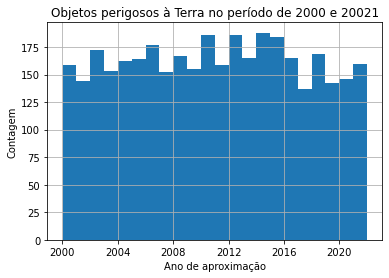

In [28]:
dang_obj_period = obj_period.loc[obj_period['is_potentially_hazardous_asteroid']==True]
dang_obj_period['close_approach_date'].hist(bins=22)
plt.title('Objetos perigosos à Terra no período de 2000 e 20021')
plt.xlabel('Ano de aproximação')
plt.ylabel('Contagem')
plt.show()

## Histograma dos tamanhos dos objetos perigosos

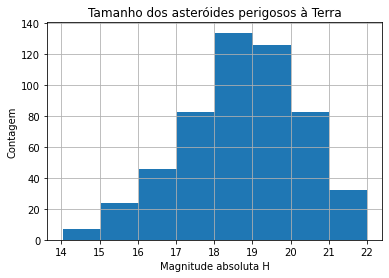

In [30]:
dang_obj['absolute_magnitude_h'].hist(bins=8)
plt.title('Tamanho dos asteróides perigosos à Terra')
plt.xlabel('Magnitude absoluta H')
plt.ylabel('Contagem')
plt.show()

## Histograma dos tamanhos dos objetos inofencivos

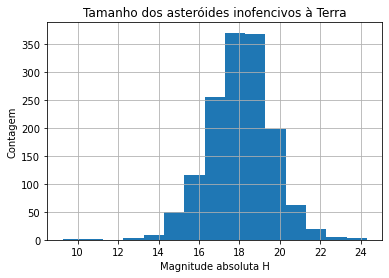

In [32]:
simp_df.loc[-simp_df['id'].isin(dang_obj_id)]['absolute_magnitude_h'].hist(bins=15)
plt.title('Tamanho dos asteróides inofencivos à Terra')
plt.xlabel('Magnitude absoluta H')
plt.ylabel('Contagem')
plt.show()